In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [57]:
covid_df=pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
nepal=covid_df.loc[covid_df['location']=='Nepal']
nepal.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
34877,NPL,Asia,Nepal,2020-10-09,98617.0,4364.0,2698.429,590.0,12.0,11.571,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34878,NPL,Asia,Nepal,2020-10-10,100676.0,2059.0,2603.714,600.0,10.0,11.429,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34879,NPL,Asia,Nepal,2020-10-11,105684.0,5008.0,3016.286,614.0,14.0,12.286,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34880,NPL,Asia,Nepal,2020-10-12,107755.0,2071.0,2990.286,636.0,22.0,14.429,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34881,NPL,Asia,Nepal,2020-10-13,111802.0,4047.0,3219.857,645.0,9.0,13.000,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574


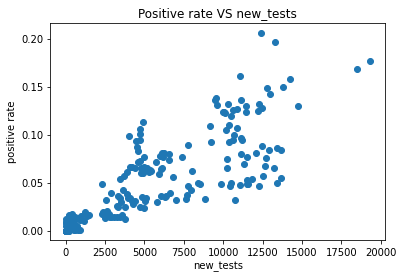

In [60]:
plt.scatter(nepal['new_tests'],nepal['positive_rate'])
plt.title('Positive rate VS new_tests')
plt.xlabel('new_tests')
plt.ylabel('positive rate')
plt.show()

The positive rate is decreasing as the test per case is increasing

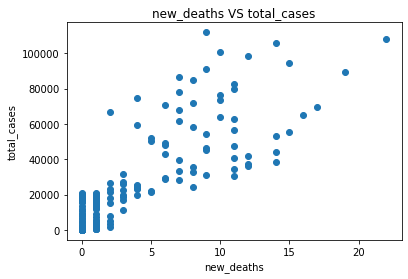

In [27]:
plt.scatter(nepal['new_deaths'],nepal['total_cases'])
plt.title('new_deaths VS total_cases')
plt.xlabel('new_deaths')
plt.ylabel('total_cases')
plt.show()

New Deaths are increasing as total number of cases rise.

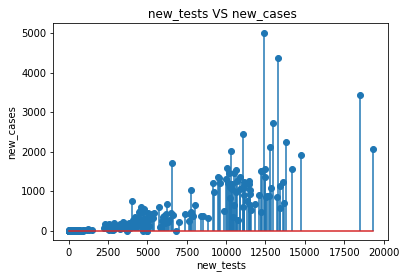

In [37]:
plt.stem(nepal['new_tests'],nepal['new_cases'])
plt.title(' new_tests VS new_cases')
plt.xlabel('new_tests')
plt.ylabel('new_cases')
plt.show()

New cases increases as new tests are done


In [41]:
nepal = nepal[['total_cases','new_cases','new_cases_smoothed','total_cases_per_million','new_cases_per_million','new_cases_smoothed_per_million','new_tests','total_tests','total_tests_per_thousand','new_tests_per_thousand']]
# nepal.isna().sum()


total_cases                       13
new_cases                         13
new_cases_smoothed                 6
total_cases_per_million           13
new_cases_per_million             13
new_cases_smoothed_per_million     6
new_tests                         67
total_tests                       54
total_tests_per_thousand          54
new_tests_per_thousand            67
dtype: int64

In [42]:
def fill_colmn(df,column):
    for i in column:
        df[i].fillna(df[i].median(),inplace=True)

In [43]:
fill_colmn(nepal,['total_cases','new_cases','new_cases_smoothed','total_cases_per_million','new_cases_per_million','new_cases_smoothed_per_million','new_tests','total_tests','total_tests_per_thousand','new_tests_per_thousand'])

In [44]:
nepal.tail()

,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand
34877,98617.0,4364.0,2698.429,3384.619,149.776,92.612,13279.0,1145237.0,39.3060,0.456
34878,100676.0,2059.0,2603.714,3455.286,70.667,89.362,19320.0,1164557.0,39.9690,0.663
34879,105684.0,5008.0,3016.286,3627.165,171.879,103.521,12427.0,1176984.0,40.3950,0.427
34880,107755.0,2071.0,2990.286,3698.243,71.078,102.629,4588.0,146755.0,5.0365,0.157
34881,111802.0,4047.0,3219.857,3837.140,138.896,110.508,4588.0,146755.0,5.0365,0.157


In [45]:
X=nepal.drop('new_cases',axis=1)
Y=nepal['new_cases']

In [46]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=12)

In [47]:
from sklearn.linear_model import Ridge
rdg=Ridge(alpha=1.0)
rdg.fit(x_train,y_train)

Ridge()

In [48]:
y_preds=rdg.predict(x_test)

In [49]:
rdg.score(x_test,y_test)

0.9999999990925202

In [50]:
y_test

34831     818.0
34850    1454.0
34727      14.0
34605       0.0
34688       0.0
34815     464.0
34788      70.0
34669       0.0
34730      39.0
34700       2.0
34705       0.0
34606       0.0
34711       0.0
34858    1204.0
34680       0.0
34636       0.0
34833     855.0
34721       0.0
34615       0.0
34799     150.0
34871    2722.0
34826    1016.0
34642       0.0
34800     147.0
34861    1356.0
34695       0.0
34610       0.0
34597       0.0
34848    1081.0
34738      61.0
34681       0.0
34836     927.0
34646       0.0
34811     418.0
34864    1313.0
34823     468.0
34628       0.0
34779     473.0
34629       0.0
34804     139.0
34658      61.0
34822     594.0
34661      61.0
34625       0.0
34870    1911.0
34795      57.0
34780     740.0
34875    1551.0
34719      16.0
34782     293.0
34601       0.0
34805     311.0
34736      42.0
34684       0.0
34851    1201.0
34763     380.0
34743     114.0
34677       0.0
Name: new_cases, dtype: float64

In [63]:
y_preds[0]

817.9933948899364

In [64]:
y_preds[2]

13.982692947036151